import libraries

In [1]:
import numpy as np 
import pandas as pd
import sklearn as skl 
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt 

load the dataset

In [2]:
iris_data = load_iris()
print(iris_data['feature_names'])
display(iris_data['data'])
print(iris_data['target_names'])
display(iris_data['target'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

scatterplots of the original dataset with respect to different variables

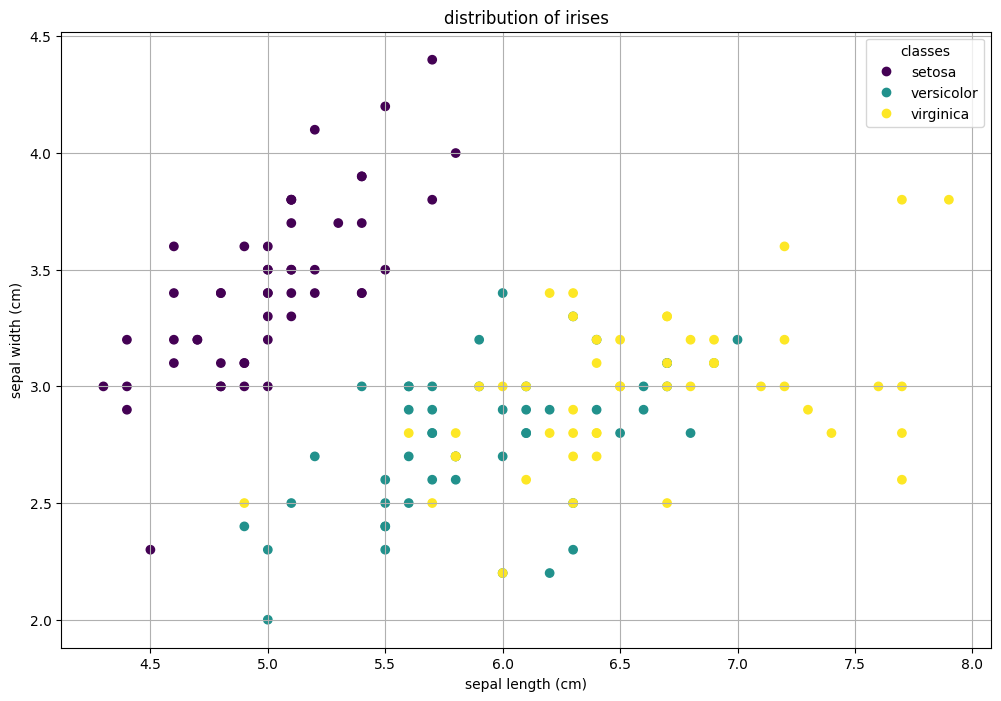

In [7]:
plt.figure(figsize = (12,8))
plt.title('distribution of irises')
scatter = plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c = iris_data['target'])
plt.xlabel(iris_data['feature_names'][0])
plt.ylabel(iris_data['feature_names'][1])
plt.legend(scatter.legend_elements()[0], iris_data['target_names'], title = 'classes')
plt.grid(True)
plt.show()

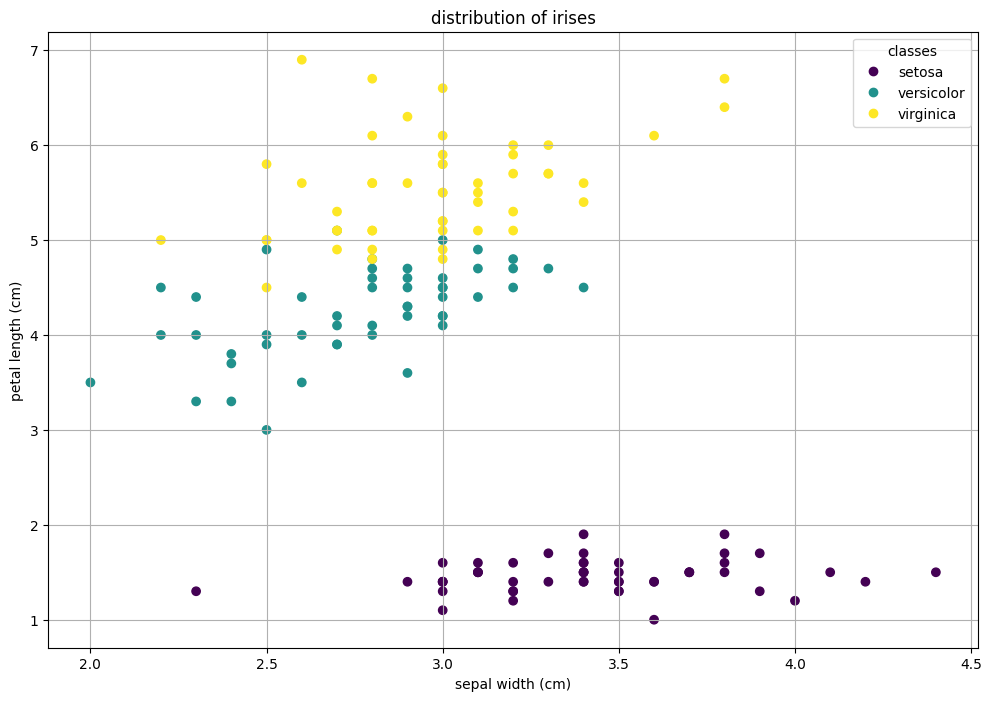

In [8]:
plt.figure(figsize = (12,8))
plt.title('distribution of irises')
plt.scatter(iris_data.data[:, 1], iris_data.data[:, 2], c = iris_data['target'])
plt.xlabel(iris_data['feature_names'][1])
plt.ylabel(iris_data['feature_names'][2])
plt.legend(scatter.legend_elements()[0], iris_data['target_names'], title = 'classes')
plt.grid(True)
plt.show()

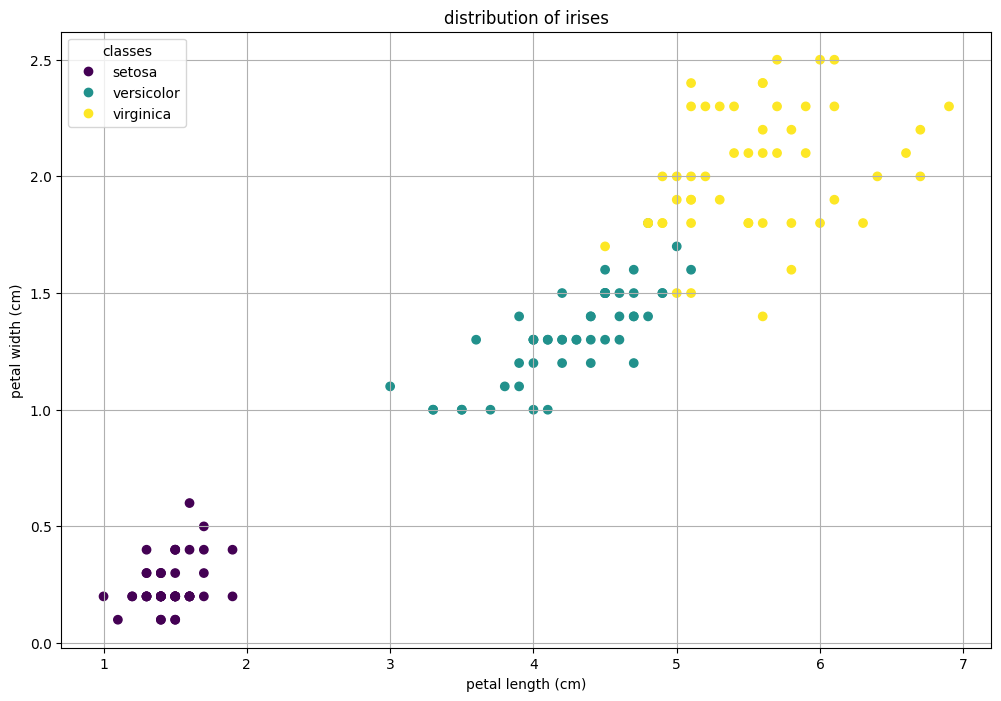

In [9]:
plt.figure(figsize = (12,8))
plt.title('distribution of irises')
plt.scatter(iris_data.data[:, 2], iris_data.data[:, 3], c = iris_data['target'])
plt.xlabel(iris_data['feature_names'][2])
plt.ylabel(iris_data['feature_names'][3])
plt.legend(scatter.legend_elements()[0], iris_data['target_names'], title = 'classes')
plt.grid(True)
plt.show()

3D scatterplot of the original dataset 

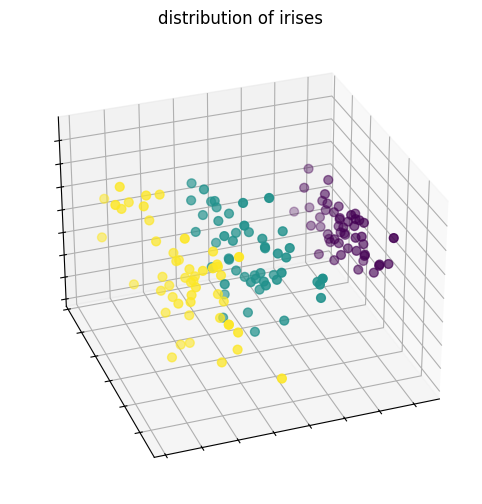

In [10]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X_reduced = PCA(n_components = 3).fit_transform(iris_data['data'])
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris_data['target'],
    s=40,
)

ax.set_title('distribution of irises')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

split the dataset into testing and training data

In [11]:
x = iris_data['data']
y = iris_data['target']

x_train, x_test, y_train, y_val = train_test_split (x, y, test_size = 0.3, train_size = 0.7, random_state = 42)
print('x training data:')
print(x_train)
print(len(x_train))
print('x testing data:')
print(x_test)
print(len(x_test))
print('y training data:')
print(y_train)
print(len(y_train))
print('y testing data:')
print(y_val)
print(len(y_val))


x training data:
[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.2]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.  2.7 5.1 1.6]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.5 2.5 4.  1.3]
 [4.4 2.9 1.4 

build the multi-layer perceptron on the training dataset

In [12]:
mlp = MLPClassifier(activation = 'relu',
                    hidden_layer_sizes = 100,
                    solver = 'adam', 
                    random_state = 3,
                    max_iter = 500, 
                    learning_rate = 'constant')

mlp.fit(x_train, y_train)
train_score = mlp.score(x_train, y_train)
print(f'mean accuracy on the given training data: {train_score}')


mean accuracy on the given training data: 0.9809523809523809


c:\Users\fletx\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


watch the multi-layer perceptrons performance on the testing dataset

In [14]:
test_score = mlp.score(x_test, y_val)
print(f'mean accuracy on the given testing data: {test_score}')
predictions = mlp.predict(x_test)
print(f'predicitions: {predictions}')
print(len(predictions))
print(f'y-test: {y_val}')
print(len(y_val))


mean accuracy on the given testing data: 1.0
predicitions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
45
y-test: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
45


classification of irises

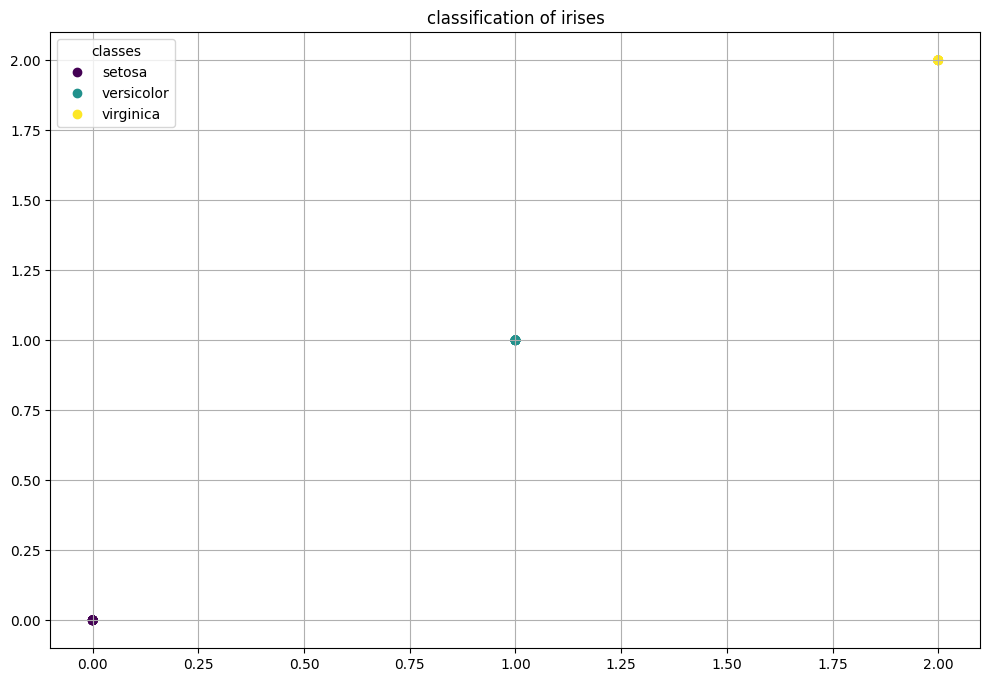

In [15]:
plt.figure(figsize = (12,8))
plt.title('classification of irises')
plt.scatter(predictions, y_val, c = predictions)
plt.legend(scatter.legend_elements()[0], iris_data['target_names'], title = 'classes')
plt.grid(True)
plt.show() 

classification of irises 3D visualization

['setosa' 'versicolor' 'virginica']


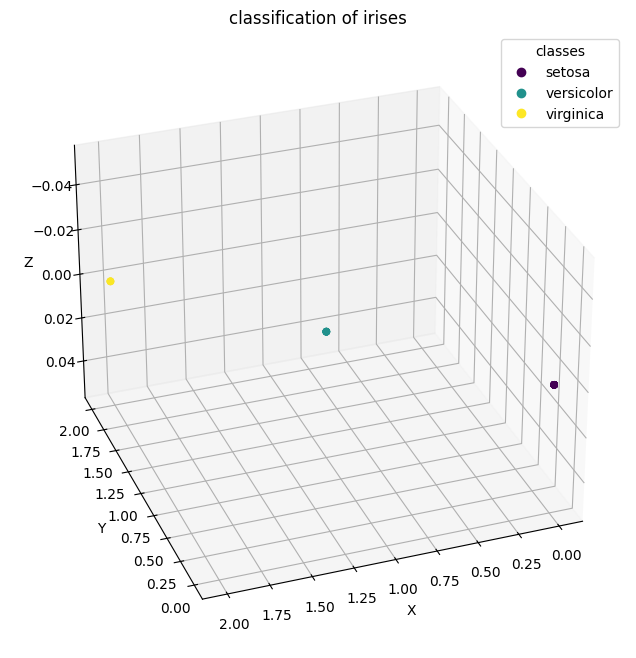

In [16]:
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)
ax.set_title('classification of irises')
ax.scatter(predictions, y_val, c = predictions)
ax.set_xlabel('X')
# ax.xaxis.set_ticklabels([])
ax.set_ylabel('Y')
# ax.yaxis.set_ticklabels([])
ax.set_zlabel('Z')
# ax.zaxis.set_ticklabels([])
print(iris_data['target_names'])
ax.legend(scatter.legend_elements()[0], iris_data['target_names'], title = 'classes')
plt.grid(True)
plt.show()